<a href="https://colab.research.google.com/github/IvanSalinas2000/Aprendizaje-automatico/blob/main/Tareas/Tarea5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Metodo de spectral clustering

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler




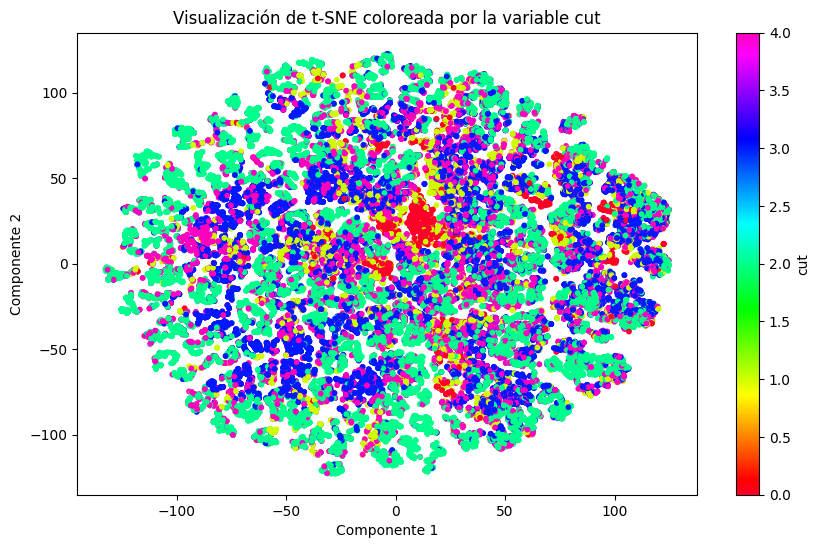

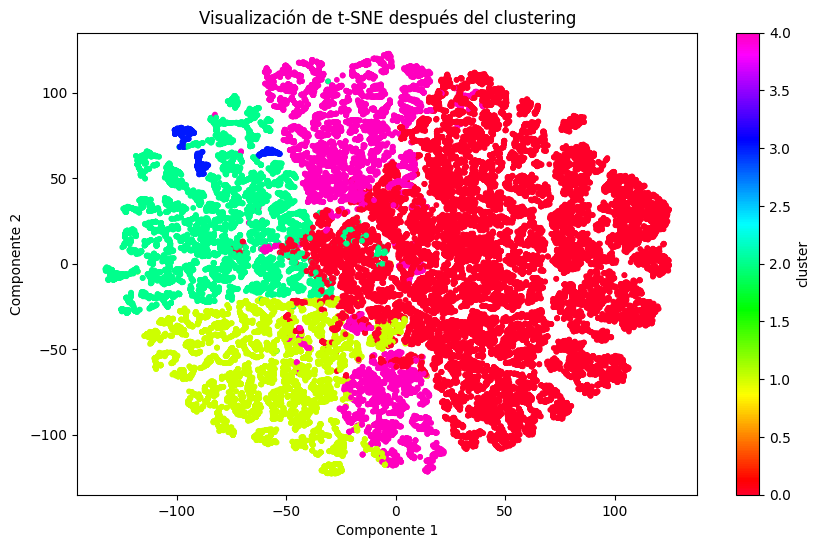

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

# Cargar los datos desde el archivo CSV
data = pd.read_csv("/content/diamantesCLEAN.csv")

# Extraer la variable "cut" y otras características relevantes
cut_data = data["cut"]
X = data.drop(columns=["cut"])  # Suponiendo que "cut" es la columna objetivo y el resto son características

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar Spectral Clustering
n_clusters = 5
spectral_clustering = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', assign_labels='kmeans', random_state=42)
clusters = spectral_clustering.fit_predict(X_scaled)

# Agregar los resultados del clustering al DataFrame original
data['cluster'] = clusters

# Aplicar t-SNE para reducir la dimensionalidad a 2 componentes
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Visualizar los resultados usando t-SNE
plt.figure(figsize=(10, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=cut_data, cmap='gist_rainbow', s=10)  # Usar los valores reales de "cut" para colorear
plt.title('Visualización de t-SNE coloreada por la variable cut')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.colorbar(label='cut')
plt.show()

# Visualizar los resultados del clustering usando t-SNE
plt.figure(figsize=(10, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=clusters, cmap='gist_rainbow', s=10)  # Usar los resultados del clustering para colorear
plt.title('Visualización de t-SNE después del clustering')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.colorbar(label='cluster')
plt.show()


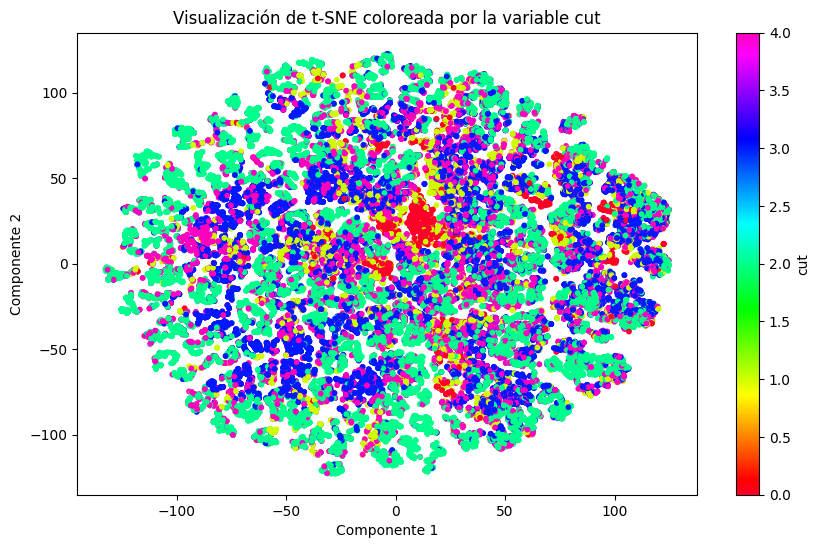

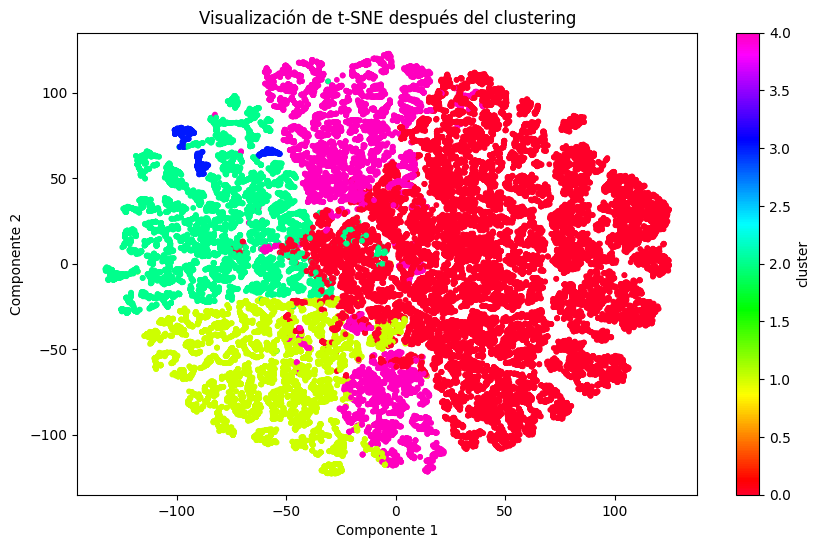

In [16]:
# Visualizar los resultados usando t-SNE
plt.figure(figsize=(10, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=cut_data, cmap='gist_rainbow', s=10)  # Usar los valores reales de "cut" para colorear
plt.title('Visualización de t-SNE coloreada por la variable cut')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.colorbar(label='cut')
plt.savefig('tsne_colored_by_cut.png')  # Guardar la figura
plt.show()

# Visualizar los resultados del clustering usando t-SNE
plt.figure(figsize=(10, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=clusters, cmap='gist_rainbow', s=10)  # Usar los resultados del clustering para colorear
plt.title('Visualización de t-SNE después del clustering')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.colorbar(label='cluster')
plt.savefig('tsne_colored_by_clusters.png')  # Guardar la figura
plt.show()